## Observations and Insights 

In [1]:
 %matplotlib notebook 

In [2]:
# Set Dependencies 
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress


# Set file paths
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read files
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combine_results_df = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')

# Display the data table for preview
combine_results_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Check the number of mice.
print(f"There are {combine_results_df['Mouse ID'].nunique()} mice")

There are 249 mice


In [4]:
# Get the duplicate mice by ID numbers that shows up for Mouse ID and Timepoint. 
duplicate_mice_df = combine_results_df[combine_results_df[["Mouse ID", "Timepoint"]].duplicated() == True]

duplicate_mice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_df = combine_results_df[combine_results_df[["Mouse ID", "Timepoint"]].duplicated(keep="last") == True]

duplicate_mice_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
912,g989,Propriva,Female,21,26,10,51.745156,0
914,g989,Propriva,Female,21,26,15,51.325852,1
916,g989,Propriva,Female,21,26,20,55.326122,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_mouse_df = combine_results_df[combine_results_df["Mouse ID"] != 'g989']

In [7]:
# Checking the number of mice in the clean DataFrame.
print(f"There are {cleaned_mouse_df['Mouse ID'].nunique()} unique mice once the mouse with duplicate data is removed")


There are 248 unique mice once the mouse with duplicate data is removed


## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#Create a dataframe grouped by drug regimen
summary_stats_df = cleaned_mouse_df.groupby("Drug Regimen")

#Run summary statistics
mean_tv = summary_stats_df["Tumor Volume (mm3)"].mean()

median_tv = summary_stats_df["Tumor Volume (mm3)"].median()

var_tv = summary_stats_df["Tumor Volume (mm3)"].var()

std_tv = summary_stats_df["Tumor Volume (mm3)"].std()

sem_tv = summary_stats_df["Tumor Volume (mm3)"].sem()


#Create a dataframe with the statistics
summary_stats_df = pd.DataFrame({"Mean Tumor Volume": mean_tv,
                                "Median Tumor Volume": median_tv,
                                "Variance in Tumor Volume": var_tv,
                                "Standard Deviation of Tumor Volume": std_tv,
                                "SEM of Tumor Volume":sem_tv})

#Clean up the dataframe
summary_stats_df["Mean Tumor Volume"] = summary_stats_df["Mean Tumor Volume"].map("{0:,.2f}mm3".format)
summary_stats_df["Median Tumor Volume"] = summary_stats_df["Median Tumor Volume"].map("{0:,.2f}mm3".format)
summary_stats_df["Variance in Tumor Volume"] = summary_stats_df["Variance in Tumor Volume"].map("{0:,.2f}mm3".format)
summary_stats_df["Standard Deviation of Tumor Volume"] = summary_stats_df["Standard Deviation of Tumor Volume"].map("{0:,.2f}mm3".format)
summary_stats_df["SEM of Tumor Volume"] = summary_stats_df["SEM of Tumor Volume"].map("{0:,.2f}mm3".format)

#Display the new dataframe
summary_stats_df

,Mean Tumor Volume,Median Tumor Volume,Variance in Tumor Volume,Standard Deviation of Tumor Volume,SEM of Tumor Volume
Drug Regimen,,,,,
Capomulin,40.68mm3,41.56mm3,24.95mm3,4.99mm3,0.33mm3
Ceftamin,52.59mm3,51.78mm3,39.29mm3,6.27mm3,0.47mm3
Infubinol,52.88mm3,51.82mm3,43.13mm3,6.57mm3,0.49mm3
Ketapril,55.24mm3,53.70mm3,68.55mm3,8.28mm3,0.60mm3
Naftisol,54.33mm3,52.51mm3,66.17mm3,8.13mm3,0.60mm3
Placebo,54.03mm3,52.29mm3,61.17mm3,7.82mm3,0.58mm3
Propriva,52.32mm3,50.45mm3,43.85mm3,6.62mm3,0.54mm3
Ramicane,40.22mm3,40.67mm3,23.49mm3,4.85mm3,0.32mm3
Stelasyn,54.23mm3,52.43mm3,59.45mm3,7.71mm3,0.57mm3


## Bar and Pie Charts

<IPython.core.display.Javascript object>


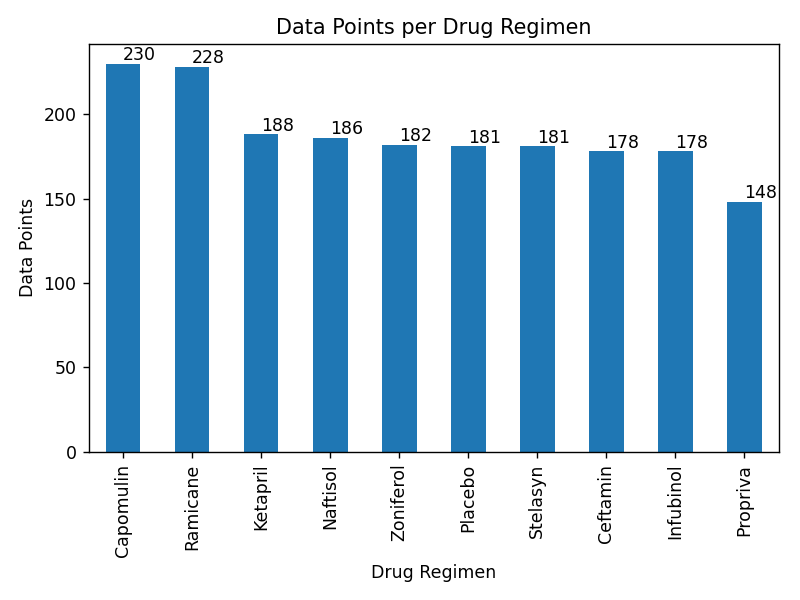

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

#get our data from the cleaned dataframe
drug_data = cleaned_mouse_df["Drug Regimen"].value_counts()

#create a bar plot
mouse_plot = drug_data.plot(kind="bar")

#label the values on top of each bar
for index,value in enumerate(drug_data):
    mouse_plot.annotate(value,(index, value), xytext=(0,2),textcoords='offset points')

#add title and x/y labels
plt.title("Data Points per Drug Regimen")
plt.ylabel("Data Points")
plt.xlabel("Drug Regimen")

#tighten the layout
plt.tight_layout()

<IPython.core.display.Javascript object>


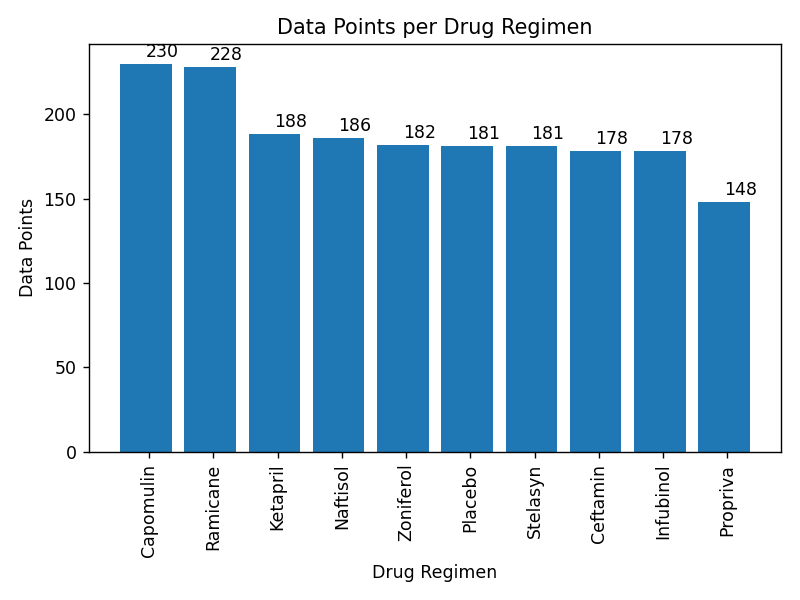

In [27]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

#Sort data to create a bar chart
drug_data = cleaned_mouse_df.sort_values("Drug Regimen")["Drug Regimen"].value_counts()



#generate index for .ax pyplot figure
index= np.arange(len(drug_data.index))

#set width and create subplot
width= 0.1
fig, ax = plt.subplots()
drugs1 = ax.bar(index - width/2, drug_data)

#add labels and title, clean up chart
ax.set_ylabel("Data Points")
ax.set_xlabel("Drug Regimen")
ax.set_title("Data Points per Drug Regimen")
ax.set_xticks(index)
plt.xticks(rotation=90)
ax.set_xticklabels(drug_data.index)

#create function to add values on top of each bar
def autolabel(drugs, xpos='center'):
    
    ha = {'center': 'center', 'center': 'left', 'left': 'right'}
    offset = {'center': 0, 'right': 1, 'left': -1}

    for drug in drugs:
        height = drug.get_height()
        ax.annotate('{}'.format(height),
                    xy=(drug.get_x() + drug.get_width()/2, height),
                    xytext=(offset[xpos]*3, 3),  # use 3 points offset
                    textcoords="offset pixels",  # in both directions
                    ha=ha[xpos], va='bottom')


autolabel(drugs1)

#tigheten layout
fig.tight_layout()

<IPython.core.display.Javascript object>


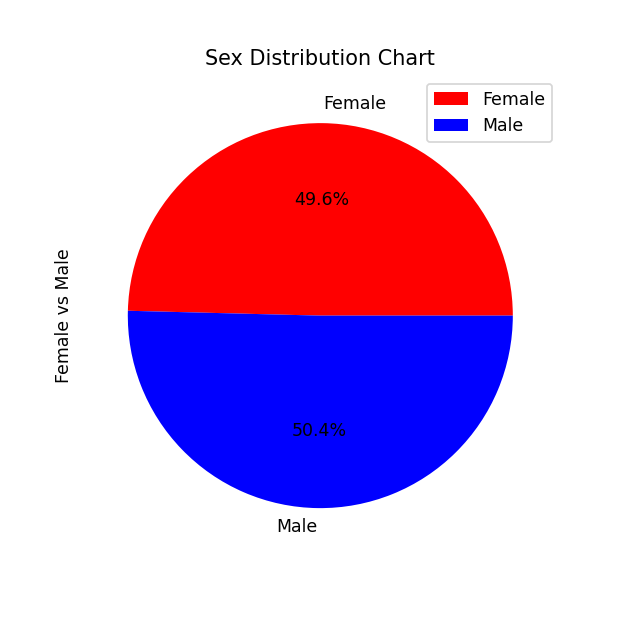

Text(0.5, 1.0, 'Sex Distribution Chart')

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

#locate our data by number of unique male and female mice
male_mouse = cleaned_mouse_df.loc[cleaned_mouse_df["Sex"]=="Male", "Mouse ID"].nunique()
female_mouse = cleaned_mouse_df.loc[cleaned_mouse_df["Sex"]=="Female", "Mouse ID"].nunique()

#create dataframe
sex_dist_df = pd.DataFrame ({"Female vs Male": [female_mouse, male_mouse]},
                           index=["Female","Male"])

#plot data in pie chart
colors = ["red", "blue"]
plot = sex_dist_df.plot.pie(y="Female vs Male", figsize=(5,5), colors=colors, autopct="%1.1f%%")

#add title
plt.title("Sex Distribution Chart")


<IPython.core.display.Javascript object>


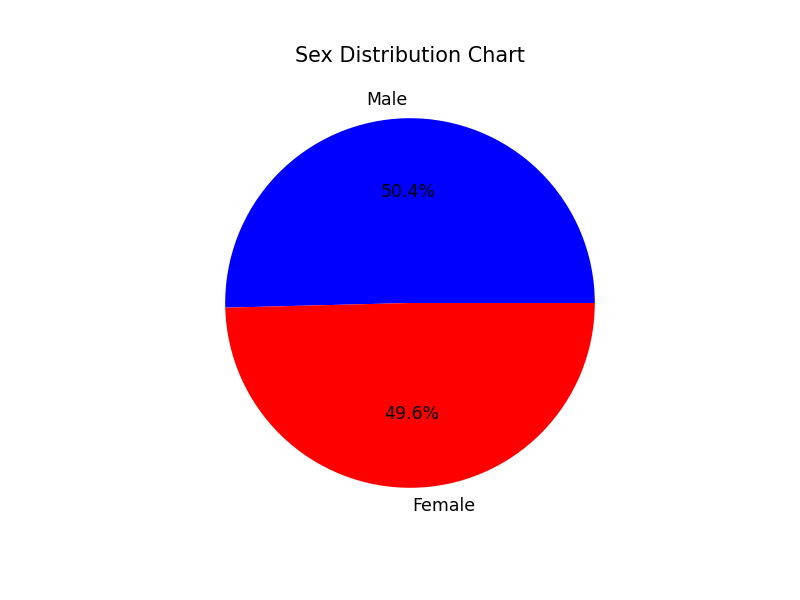

Text(0.5, 1.0, 'Sex Distribution Chart')

In [28]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

#locate our data by number of unique male and female mice and put it into a variable
sex_dist = [cleaned_mouse_df.loc[cleaned_mouse_df["Sex"]=="Male", "Mouse ID"].nunique(), \
            cleaned_mouse_df.loc[cleaned_mouse_df["Sex"]=="Female", "Mouse ID"].nunique()]

#add parameters for our chart
sex = ["Male", "Female"]
colors = ["blue", "red"]

#plot pie chart
plt.pie(sex_dist, labels=sex, colors=colors, autopct="%1.1f%%")

#add title
plt.title("Sex Distribution Chart")


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  

# Create a new dataframe for Capomulin, Ramicane, Infubinol, and Ceftamin
target_drugs_df = cleaned_mouse_df.loc[:, ("Mouse ID",
                                           "Drug Regimen",
                                           "Sex",
                                           "Age_months",
                                           "Weight (g)",
                                           "Timepoint",
                                           "Tumor Volume (mm3)",
                                           "Metastatic Sites")]

#index all non-target drugs
placebo = target_drugs_df[target_drugs_df["Drug Regimen"] == "Placebo"].index
zoniferol = target_drugs_df[target_drugs_df["Drug Regimen"] == "Zoniferol"].index
propriva = target_drugs_df[target_drugs_df["Drug Regimen"] == "Propriva"].index
stelasyn = target_drugs_df[target_drugs_df["Drug Regimen"] == "Stelasyn"].index
naftisol = target_drugs_df[target_drugs_df["Drug Regimen"] == "Naftisol"].index
ketapril = target_drugs_df[target_drugs_df["Drug Regimen"] == "Ketapril"].index



#remove all non-target drugs
target_drugs_df.drop(placebo, inplace=True)
target_drugs_df.drop(zoniferol, inplace=True)
target_drugs_df.drop(propriva, inplace=True)
target_drugs_df.drop(stelasyn, inplace=True)
target_drugs_df.drop(naftisol, inplace=True)
target_drugs_df.drop(ketapril, inplace=True)


# Find the greatest timepoint for each mouse
greatest_timepoint_df = target_drugs_df.groupby("Mouse ID")["Timepoint"].max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
last_tumor_vol_df = pd.merge(greatest_timepoint_df, target_drugs_df, how="left", on=("Mouse ID", "Timepoint"))

#display new dataframe
last_tumor_vol_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
95,y769,45,Ceftamin,Female,6,27,68.594745,4
96,y793,45,Capomulin,Male,17,17,31.896238,2
97,y865,45,Ceftamin,Male,23,26,64.729837,3
98,z578,45,Ramicane,Male,11,16,30.638696,0


In [14]:
#Ramicane Quantiles and Outliers Without Loop

#locate data
ramicane = last_tumor_vol_df.loc[last_tumor_vol_df["Drug Regimen"]=="Ramicane"]["Tumor Volume (mm3)"]

#calculate quantiles and iqr
ramicane_lowerq = ramicane.quantile(0.25)
ramicane_medq = ramicane.quantile(0.5)
ramicane_upperq = ramicane.quantile(0.75)
ramicane_iqr = ramicane_upperq-ramicane_lowerq
ramicane_lower_bound = ramicane_lowerq - (1.5*ramicane_iqr)
ramicane_upper_bound = ramicane_upperq + (1.5*ramicane_iqr)

#print results
print(f"The lower quartile of Ramicane tumor volumes is: {round(float(ramicane_lowerq),2)}")
print(f"The upper quartile of  Ramicane tumor volumes is: {round(float(ramicane_upperq),2)}")
print(f"The interquartile range of Ramicane tumor volumes is: {round(float(ramicane_iqr),2)}")
print(f"The the median of Ramicane tumor volumes is: {round(float(ramicane_medq),2)} ")
print(f"Values below {round(float(ramicane_lower_bound),2)} could be outliers.")
print(f"Values above {round(float(ramicane_upper_bound),2)} could be outliers.")

The lower quartile of Ramicane tumor volumes is: 31.56
The upper quartile of  Ramicane tumor volumes is: 40.66
The interquartile range of Ramicane tumor volumes is: 9.1
The the median of Ramicane tumor volumes is: 36.56 
Values below 17.91 could be outliers.
Values above 54.31 could be outliers.


In [15]:
#Capomulin Quantiles and Outliers Without Loop

#locate data
capomulin = last_tumor_vol_df.loc[last_tumor_vol_df["Drug Regimen"]=="Capomulin"]["Tumor Volume (mm3)"]

#calculate quantiles and iqr
capomulin_lowerq = capomulin.quantile(0.25)
capomulin_medq = capomulin.quantile(0.5)
capomulin_upperq = capomulin.quantile(0.75)
capomulin_iqr = capomulin_upperq-capomulin_lowerq
capomulin_lower_bound = capomulin_lowerq - (1.5*capomulin_iqr)
capomulin_upper_bound = capomulin_upperq + (1.5*capomulin_iqr)

#print results
print(f"The lower quartile of Capomulin tumor volumes is: {round(float(capomulin_lowerq),2)}")
print(f"The upper quartile of  Capomulin tumor volumes is: {round(float(capomulin_upperq),2)}")
print(f"The interquartile range of Capomulin tumor volumes is: {round(float(capomulin_iqr),2)}")
print(f"The the median of Capomulin tumor volumes is: {round(float(capomulin_medq),2)} ")
print(f"Values below {round(float(capomulin_lower_bound),2)} could be outliers.")
print(f"Values above {round(float(capomulin_upper_bound),2)} could be outliers.")


The lower quartile of Capomulin tumor volumes is: 32.38
The upper quartile of  Capomulin tumor volumes is: 40.16
The interquartile range of Capomulin tumor volumes is: 7.78
The the median of Capomulin tumor volumes is: 38.13 
Values below 20.7 could be outliers.
Values above 51.83 could be outliers.


In [16]:
#Ceftamin Quantiles and Outliers Without Loop

#locate data
ceftamin = last_tumor_vol_df.loc[last_tumor_vol_df["Drug Regimen"]=="Ceftamin"]["Tumor Volume (mm3)"]

#calculate quantiles and iqr
ceftamin_lowerq = ceftamin.quantile(0.25)
ceftamin_medq = ceftamin.quantile(0.5)
ceftamin_upperq = ceftamin.quantile(0.75)
ceftamin_iqr = ceftamin_upperq-ceftamin_lowerq
ceftamin_lower_bound = ceftamin_lowerq - (1.5*ceftamin_iqr)
ceftamin_upper_bound = ceftamin_upperq + (1.5*ceftamin_iqr)

#print results
print(f"The lower quartile of Ceftamin tumor volumes is: {round(float(ceftamin_lowerq),2)}")
print(f"The upper quartile of  Ceftamin tumor volumes is: {round(float(ceftamin_upperq),2)}")
print(f"The interquartile range of Ceftamin tumor volumes is: {round(float(ceftamin_iqr),2)}")
print(f"The the median of Ceftamin tumor volumes is: {round(float(ceftamin_medq),2)} ")
print(f"Values below {round(float(ceftamin_lower_bound),2)} could be outliers.")
print(f"Values above {round(float(ceftamin_upper_bound),2)} could be outliers.")


The lower quartile of Ceftamin tumor volumes is: 48.72
The upper quartile of  Ceftamin tumor volumes is: 64.3
The interquartile range of Ceftamin tumor volumes is: 15.58
The the median of Ceftamin tumor volumes is: 59.85 
Values below 25.36 could be outliers.
Values above 87.67 could be outliers.


In [17]:
#Infubinol Quantiles and Outliers Without Loop

#locate data
infubinol = last_tumor_vol_df.loc[last_tumor_vol_df["Drug Regimen"]=="Infubinol"]["Tumor Volume (mm3)"]

#calculate quantiles and iqr
infubinol_lowerq = infubinol.quantile(0.25)
infubinol_medq = infubinol.quantile(0.5)
infubinol_upperq = infubinol.quantile(0.75)
infubinol_iqr = infubinol_upperq-infubinol_lowerq
infubinol_lower_bound = infubinol_lowerq - (1.5*infubinol_iqr)
infubinol_upper_bound = infubinol_upperq + (1.5*infubinol_iqr)

#print results
print(f"The lower quartile of Infubinol tumor volumes is: {round(float(infubinol_lowerq),2)}")
print(f"The upper quartile of  Infubinol tumor volumes is: {round(float(infubinol_upperq),2)}")
print(f"The interquartile range of Infubinol tumor volumes is: {round(float(infubinol_iqr),2)}")
print(f"The the median of Infubinol tumor volumes is: {round(float(infubinol_medq),2)} ")
print(f"Values below {round(float(infubinol_lower_bound),2)} could be outliers.")
print(f"Values above {round(float(infubinol_upper_bound),2)} could be outliers.")


The lower quartile of Infubinol tumor volumes is: 54.05
The upper quartile of  Infubinol tumor volumes is: 65.53
The interquartile range of Infubinol tumor volumes is: 11.48
The the median of Infubinol tumor volumes is: 60.17 
Values below 36.83 could be outliers.
Values above 82.74 could be outliers.


<IPython.core.display.Javascript object>


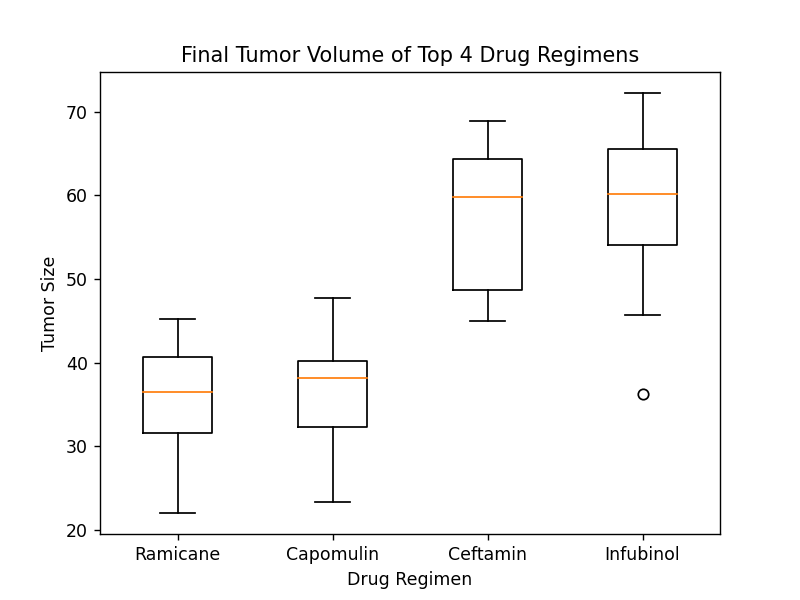

In [18]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

#create subplot to make boxplot
fig1, ax1 = plt.subplots()

#create list for data
data = [ramicane, capomulin, ceftamin, infubinol]

#create list for labels
labels = ['Ramicane', 'Capomulin', 'Ceftamin', 'Infubinol']

#create boxplot
ax1.set_title('Final Tumor Volume of Top 4 Drug Regimens')
ax1.set_xlabel('Drug Regimen')
ax1.set_ylabel('Tumor Size')
ax1.boxplot(data, labels=labels)

#display boxplot
plt.show()

## Line and Scatter Plots

<IPython.core.display.Javascript object>


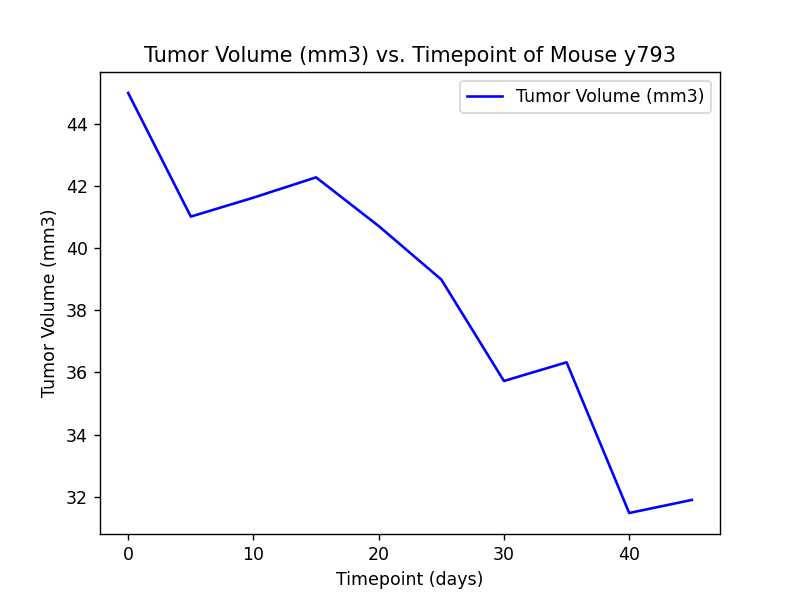

In [29]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

#locate capomulin data
capomulin_data = cleaned_mouse_df.loc[cleaned_mouse_df["Drug Regimen"]=="Capomulin"]

#choose mouse ID to plot
capomulin_mouse_id = "y793"

#locate data data within capomulin data for specific mouse by timepoint and tumor volume
capomulin_mouse_df = capomulin_data.loc[capomulin_data["Mouse ID"] == capomulin_mouse_id,\
                                        ["Timepoint", "Tumor Volume (mm3)"]]

#plot line chart
capomulin_mouse_df.plot(x ='Timepoint', y='Tumor Volume (mm3)', kind = 'line', \
                        color = "b", title="Tumor Volume (mm3) vs. Timepoint of Mouse " + capomulin_mouse_id)
#add labels
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")

#display chart
plt.show()



<IPython.core.display.Javascript object>


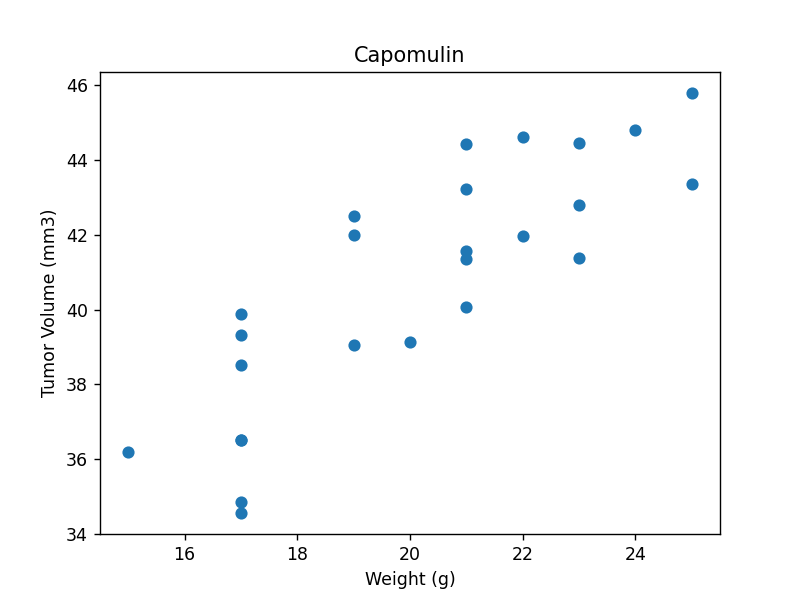

In [20]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

#find average mouse weight and tumor weight and set to variables
mouse_weight = capomulin_data.groupby("Mouse ID")["Weight (g)"].mean()
average_tumor = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

#plot and add title and labels
plt.scatter(x=mouse_weight, y=average_tumor)
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin")

#display plot
plt.show()


## Correlation and Regression

The correlation coefficient between Weight (g) and Tumor Volume is 0.84


<IPython.core.display.Javascript object>


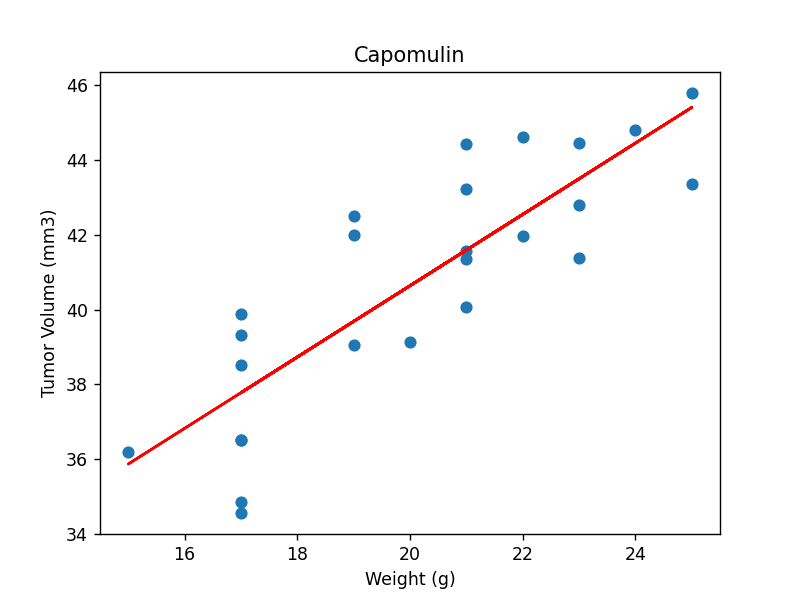

In [21]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

#calculate and print pearson coefficient
print(f"The correlation coefficient between Weight (g) and Tumor Volume is {round(st.pearsonr(mouse_weight, average_tumor)[0],2)}")

#set variables for linear regression
x_values = mouse_weight
y_values = average_tumor
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#chart regression and add labels and title
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title("Capomulin")

#display chart
plt.show()

# Observations

* The Majority of the studies had roughly the same number of treatments (180) with only two having significantly more than that and one significantly less. Sex of the mice was close to an even 50/50 split.

* The two studies that seemed to reduce the volume of tumors the most (Ramicane and Capomulin) also had to most treatments.

* There seems to be a pretty positive correlation between weight and tumor volume.

* Of the four drugs looked at closer in this project only one seems to have a clear outlier. Infubinol.